In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicializando uma lista para concatenar os chunks processados
all_temas = []

# Leitura e processamento dos chunks
for chunk in pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5):
    chunk:pd.DataFrame = chunk
    all_temas.append(chunk['tema'].value_counts())

/tmp/ipykernel_63584/3487963045.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5):
/tmp/ipykernel_63584/3487963045.py:8: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5):
/tmp/ipykernel_63584/3487963045.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5):
/tmp/ipykernel_63584/3487963045.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', sep=';', chunksize=5e5):
/tmp/ipykernel_63584/3487963045.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or

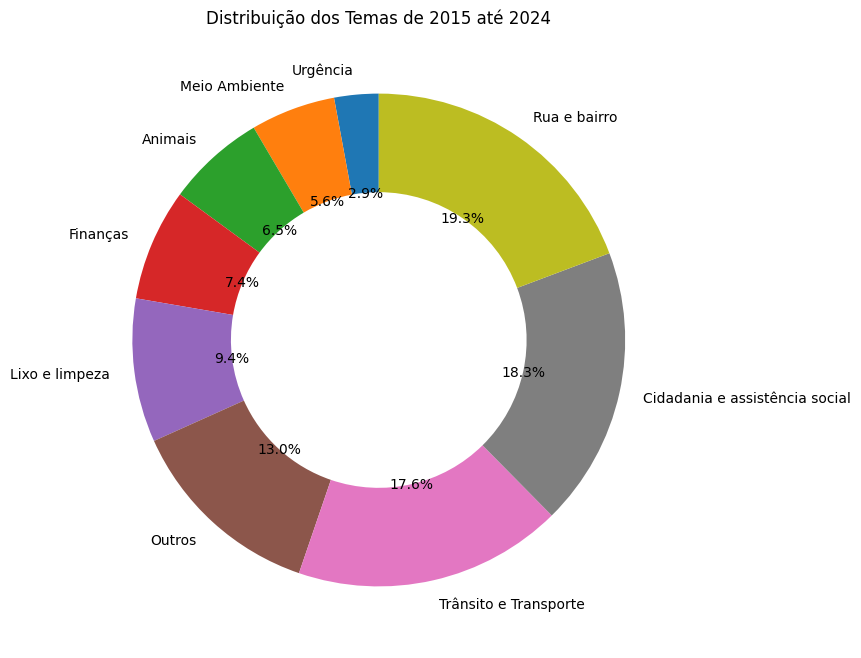

In [42]:
final_counts = pd.concat(all_temas).groupby(level=0).sum()

total = final_counts.sum()

others = 0

tuples = []
values = []
labels = []

for theme, counter in final_counts.items():
    is_valid = (counter / total) > 0.025

    if is_valid:
        values.append(counter)
        labels.append(theme)
        tuples.append((theme, counter))
    else:
        others += counter

tuples.append(("Outros", others))
sorted_tuples = list(sorted(tuples, key=lambda x: x[1]))

#Criando o gráfico de rosca
plt.figure(figsize=(8,8))
plt.pie([x[1] for x in sorted_tuples],labels=[x[0] for x in sorted_tuples], autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('Distribuição dos Temas de 2015 até 2024')
plt.show()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

aggregated_data = pd.DataFrame()

# Lendo o CSV em chunks
for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
    # Extraindo o ano
    chunk['year'] = chunk['data de abertura'].dt.year

    # Contando o número de ocorrências de cada tema por ano no chunk
    chunk_count = chunk.groupby(['year', 'tema', 'assunto', 'servico']).size().reset_index(name='count')

    # Acumulando os resultados
    aggregated_data = pd.concat([aggregated_data, chunk_count], ignore_index=True)

/tmp/ipykernel_63584/850162955.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_63584/850162955.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_63584/850162955.py:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data de abertura']):
/tmp/ipykernel_63584/850162955.py:8: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('./data/final/all_data.csv', chunksize=5e5, sep=';', parse_dates=['data d

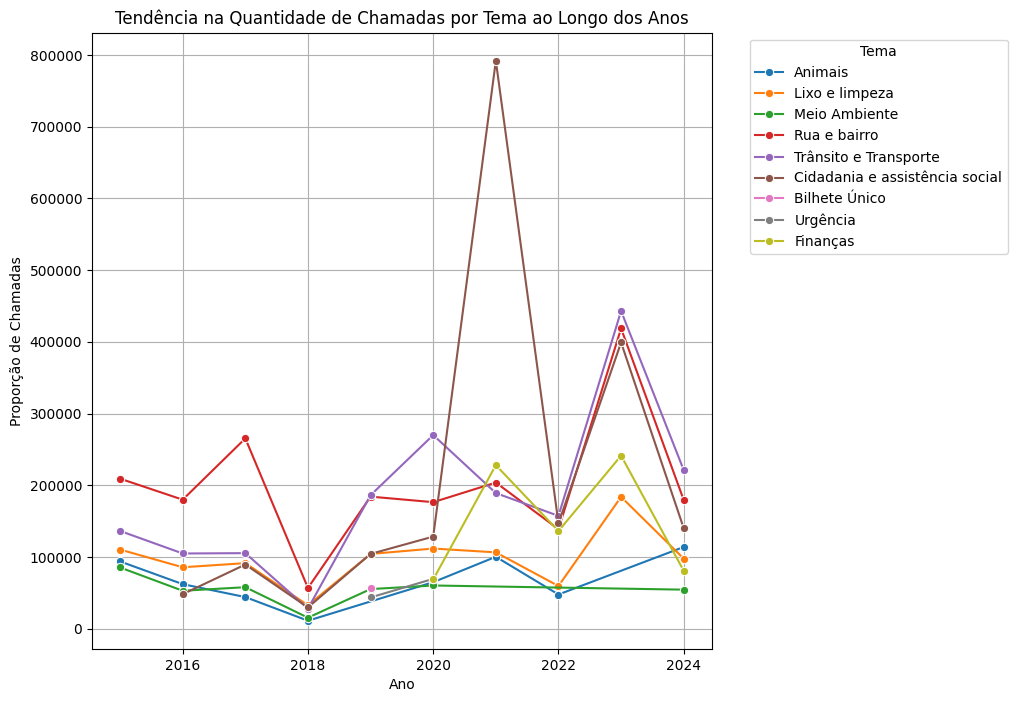

In [112]:

# Agrupando os dados agregados para somar as contagens por tema e ano
final_count_data = aggregated_data.groupby(['year', 'tema']).sum().reset_index()

# Calculando a proporção de chamadas de cada tema em relação ao total de chamadas no ano
total_per_year = final_count_data.groupby('year')['count'].sum().reset_index(name='total_count')
final_count_data = final_count_data.merge(total_per_year, on='year')


final_count_data['proportion'] = final_count_data['count'] / final_count_data['total_count']

final_count_data = final_count_data[final_count_data['proportion'] >= 0.05]

# # Filtrando os dados para 2020 e 2021
# recent_years = final_count_data[final_count_data['year'].isin([2020, 2021])]

# Plotando a tendência de proporção de temas ao longo dos anos
plt.figure(figsize=(8, 8))
sns.lineplot(data=final_count_data, x='year', y='count', hue='tema', marker='o')
plt.title('Tendência na Quantidade de Chamadas por Tema ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Chamadas')
plt.grid(True)
plt.legend(title='Tema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Exemplo de uso
# trending_themes = detect_trending_themes_from_chunks('path_to_your_large_csv_file.csv')
